In [1]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import numpy as np

from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import inconsistent
from scipy.spatial.distance import pdist

In [2]:
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

#### Generating Sample Data

In [3]:
# make sure is that you convert your data into a matrix X with n samples and m features, 
# so that X.shape == (n, m).

In [4]:
a = np.random.multivariate_normal([5, 6], [[0.5, 1], [8, 4]], size=[20,])
print(a)

[[ 4.36485  6.50997]
 [ 2.88649  3.83508]
 [ 2.87644  5.28302]
 [ 4.59626  5.07911]
 [ 5.18376  6.80683]
 [ 4.59605  5.17705]
 [ 5.44527  7.0719 ]
 [ 1.44217  4.64601]
 [ 2.40065  4.45087]
 [ 7.528    4.68474]
 [ 5.91487  6.87584]
 [ 3.00836  3.38961]
 [11.52865  7.74429]
 [ 7.83794  6.2834 ]
 [ 4.57718  5.4317 ]
 [ 1.90328  4.21725]
 [ 4.00919  5.18516]
 [ 3.46333  4.33572]
 [ 7.08708  7.00809]
 [ 3.22435  4.90172]]


<ipython-input-4-3fa877cc3dc6>:1: RuntimeWarning: covariance is not positive-semidefinite.
  a = np.random.multivariate_normal([5, 6], [[0.5, 1], [8, 4]], size=[20,])


(150, 2)


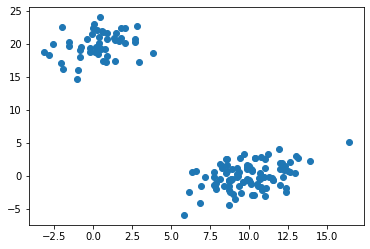

In [5]:
# generate two clusters: a with 100 points, b with 50:

np.random.seed(4711)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
#print(a)
  # for repeatability 

b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
#print("b= #########\n",b)

X = np.concatenate((a, b),)
#print("X=####### \n",X)
print (X.shape)  # 150 samples with 2 dimensions

plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
b

array([[ 0.79934, 19.28762],
       [-0.84336, 19.14768],
       [ 2.68289, 20.28232],
       [-1.92578, 16.28116],
       [ 0.06693, 23.13071],
       [ 1.42543, 20.57584],
       [ 0.89064, 20.85059],
       [ 0.46998, 19.45692],
       [ 0.64147, 21.89409],
       [ 0.83048, 17.3592 ],
       [-0.18723, 18.88187],
       [-2.84504, 18.30168],
       [-0.07865, 21.50771],
       [ 0.62828, 17.45787],
       [ 2.02318, 22.44787],
       [ 0.50775, 19.34125],
       [-1.55474, 19.69585],
       [-2.54958, 20.01232],
       [ 0.2621 , 22.16455],
       [ 1.43291, 17.48622],
       [ 0.47085, 24.08457],
       [ 1.47295, 21.63667],
       [-2.01973, 17.0863 ],
       [ 0.30695, 18.56967],
       [-0.17538, 19.50071],
       [-1.04773, 14.76553],
       [-3.1254 , 18.89846],
       [-2.0059 , 22.5818 ],
       [ 2.82514, 22.7972 ],
       [ 2.93005, 17.32672],
       [ 1.37737, 20.96611],
       [ 0.60224, 21.99693],
       [-0.37393, 20.77203],
       [ 0.0071 , 22.47931],
       [-0.765

#### Perform the Hierarchical Clustering

- As the scipy linkage docs tell, 'ward' is one of the methods that can be used to calculate the distance between newly formed clusters. 

- 'ward' causes linkage() to use the Ward variance minimization algorithm.
-  good default choice
-  other common linkage methods like 

> 1. 'single', 
> 2. 'complete', 
> 3. 'average', 

... 
and the different distance metrics like 

> 1. 'euclidean' (default), 
> 2. 'cityblock' aka Manhattan, 
> 3. 'hamming', 
> 4. 'cosine'...

In [7]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [8]:
len(Z)

149

In [9]:
Z

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

> check the __Cophenetic Correlation Coefficient__ with help of the cophenet() function. This  compares (correlates) the actual pairwise distances of the samples to those implied by the hierarchical clustering. 
- The closer the value is to 1, the better the clustering preserves the original distances

In [10]:
X.shape

(150, 2)

In [11]:
len(pdist(X))

11175

In [12]:
c, coph_dists = cophenet(Z, pdist(X))
print('Cophonetic coeff: ', c)

Cophonetic coeff:  0.9800148387574268


In [13]:
coph_dists.shape

(11175,)

#### array has the format [idx1, idx2, dist, sample_count].

In [14]:
type(Z)

numpy.ndarray

In [15]:
Z.shape

(149, 4)

- In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 52 and 53, as they only had a distance of 0.04151. 
- This created a cluster with a total of 2 samples.

In [16]:
Z[0]

array([52.     , 53.     ,  0.04151,  2.     ])

In the second iteration the algorithm decided to merge the clusters (original samples here as well) with indices 14 and 79, which had a distance of 0.04914. This again formed another cluster with a total of 2 samples.

In [17]:
Z[1]

array([14.     , 79.     ,  0.05914,  2.     ])

The indices of the clusters until now correspond to our samples. Remember that we had a total of 150 samples, so indices 0 to 149.

In [18]:
# Let's have a look at the first 20 iterations:

In [19]:
Z[:20]

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

- observe that until iteration 13 the algorithm only directly merged original samples. 
- observe the monotonic increase of the distance.

- In iteration 13 the algorithm decided to merge cluster indices 62 with 152.  
- All indices idx >= len(X) actually refer to the cluster formed in Z[idx - len(X)].

This means that while idx 149 corresponds to X[149] 
> - idx 150 corresponds to the cluster formed in Z[0], 
> - idx 151 corresponds to the cluster formed in Z[1], 
> - idx 152 corresponds to the cluster formed in Z[2], ...

> So, the merge iteration 13 merged sample 62 to our samples 33 and 68 that were previously merged in iteration 2 (152 > 2).

Check the samples with indices 33, 68, 62

In [20]:
X[[33, 68, 62]]

array([[ 9.83913, -0.4873 ],
       [ 9.89349, -0.44152],
       [ 9.97793, -0.56383]])

Seems pretty close, but let's plot the points 

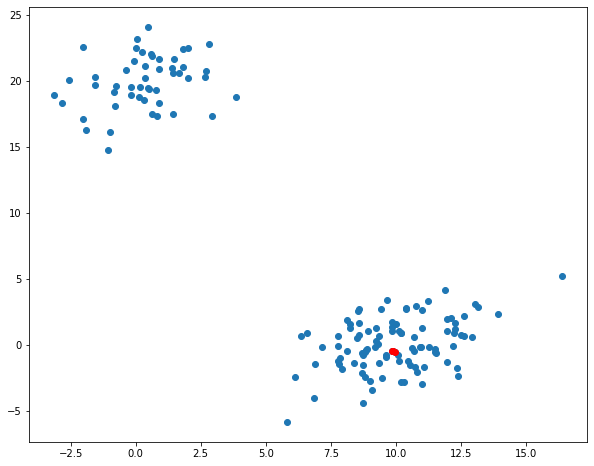

In [21]:
idxs = [33, 68, 62]

plt.figure(figsize=(10, 8))

# plot all points
plt.scatter(X[:,0], X[:,1])  

# plot interesting points in red again
plt.scatter(X[idxs, 0], X[idxs, 1], c='r')  
plt.show()

> see that the 3 red dots are pretty close to each other, which is a good thing

> The same happened in iteration 14 where the alrogithm merged indices 41 to 15 and 69:

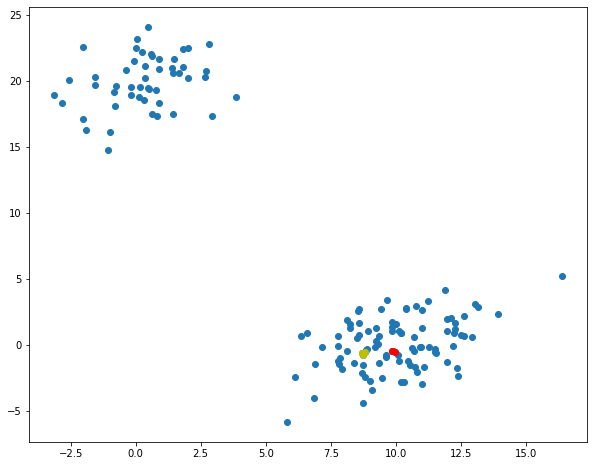

In [22]:
idxs = [33, 68, 62]

plt.figure(figsize=(10, 8))

plt.scatter(X[:,0], X[:,1])

plt.scatter(X[idxs,0], X[idxs,1], c='r')

idxs = [15, 69, 41]
plt.scatter(X[idxs,0], X[idxs,1], c='y')
plt.show()

Showing that the 3 yellow dots are also quite close.

#### Plotting a Dendrogram

> A dendrogram is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering.

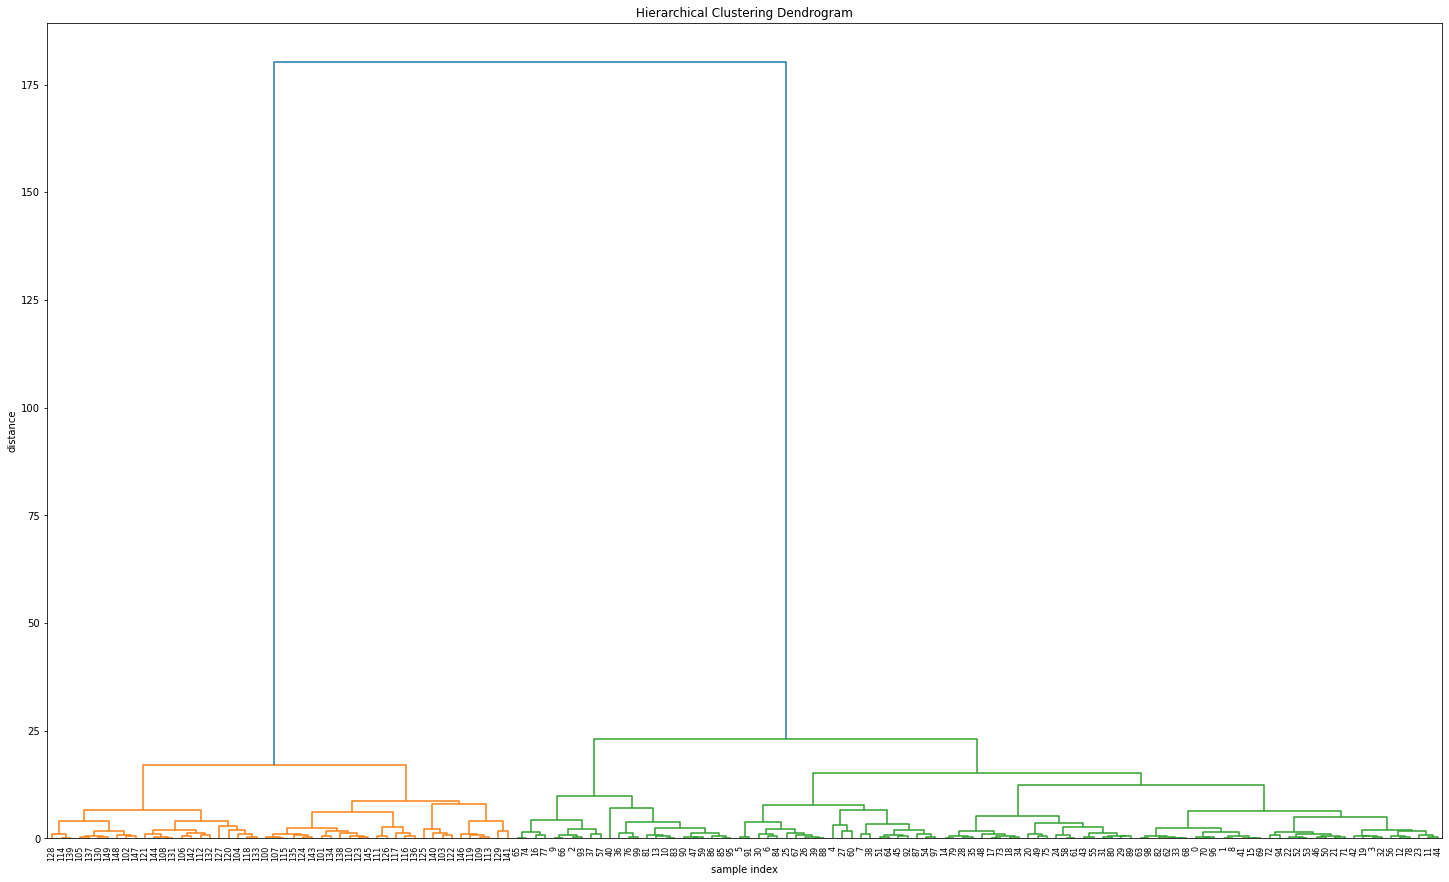

In [23]:
# calculate full dendrogram
plt.figure(figsize=(25, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
#plt.savefig('C:\\Users\\user\\Desktop\\dend.png')

- On the x axis we see labels. The indices of our samples in X.
- On the y axis we see the distances (of the 'ward' method in our case).

- Starting from each label at the bottom, we can see a vertical line up to a horizontal line. 

- The height of that horizontal line tells about the distance at which this label was merged into another label or cluster. 

- We can find that other cluster by following the other vertical line down again. If you don't encounter another horizontal line, it was just merged with the other label you reach, otherwise it was merged into another cluster that was formed earlier.

__Summarizing:__

- horizontal lines are cluster merges
- vertical lines tell which clusters/labels were part of merge forming that new cluster
- heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster

You can also see that from distances > 25 up there's a huge jump of the distance to the final merge at a distance of approx. 180. 

- Let's have a look at the distances of the last 4 merges:

In [24]:
# last 4 merges in Z
Z[-4:]

array([[290.     , 294.     ,  15.11533,  76.     ],
       [287.     , 292.     ,  17.11527,  50.     ],
       [293.     , 295.     ,  23.12199, 100.     ],
       [296.     , 297.     , 180.27043, 150.     ]])

In [25]:
# last 4 merges, show the distance column of Z

In [26]:
Z[-4:, 2]

array([ 15.11533,  17.11527,  23.12199, 180.27043])

__IMP__: Such distance jumps / gaps in the dendrogram are pretty interesting for us. They indicate that something is merged here, that maybe just shouldn't be merged. 

In other words: maybe the things that were merged here really don't belong to the same cluster, telling us that maybe there's just 2 clusters here.

> green cluster only has indices >= 100, while the red one only has such < 100.
> shows that the algorithm re-discovered the two classes 

#### Dendrogram Truncation

> the plot is pretty big for 150 samples already, probably we need to have a better way for real scenarios,

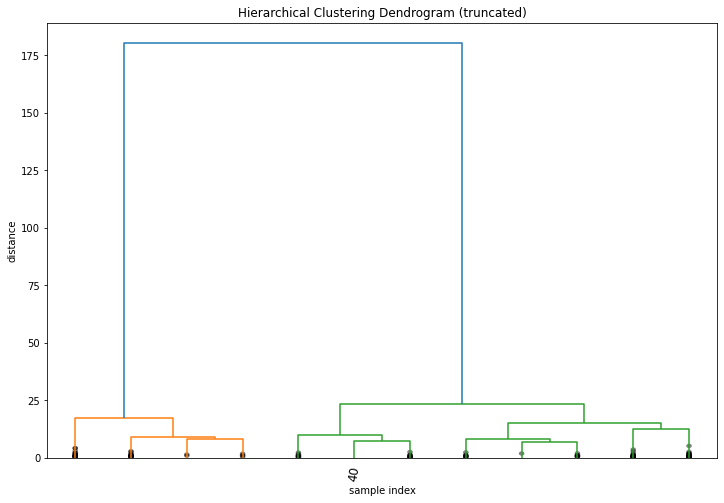

In [27]:
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',   # show only the last p merged clusters
    p=12,                    # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=80.,
    leaf_font_size=12.,
    show_contracted=True,    # to get a distribution impression in truncated branches
)
plt.show()

The above shows a truncated dendrogram, which only shows the last p=12 out of our 149 merges.

First thing you should notice are that most labels are missing. This is because except for X[40] all other samples were already merged into clusters before the last 12 merges.

> try with different values of  p= , start with 2, 3, 4, 8, 9, 10, ... notice when the sample indices start to show

> The parameter __show_contracted__ allows us to draw black dots at the heights of those previous cluster merges, dots are all at pretty small distances when compared to the huge last merge at a distance of 180,

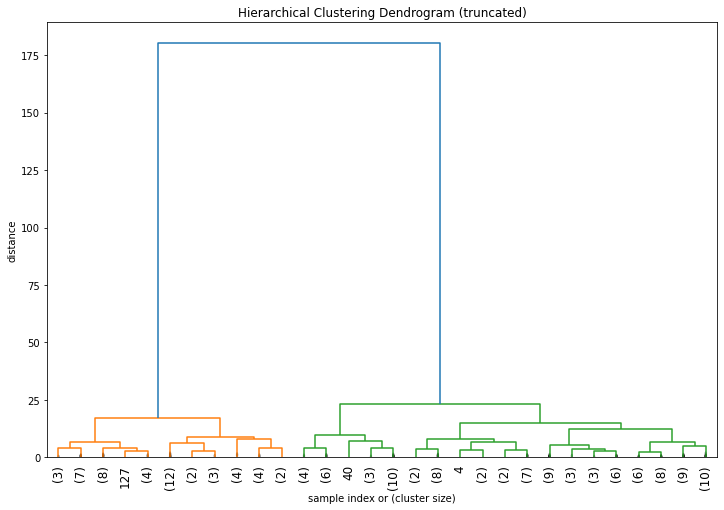

In [28]:
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
a = dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,                   # show only the last p merged clusters
    show_leaf_counts=True,  # numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

> We can now see that the right most cluster already consisted of 33 samples before the last 12 merges.

In [48]:
#a

In [29]:
rt=a['icoord']

In [34]:
sum(rt[0][1:3])*0.5

10.0

In [36]:
dcord = a['dcoord']

In [38]:
dcord[0][1]

4.003004094192886

#### Selecting a Distance Cut-Off ... Determining the Number of Clusters

- a huge jump in distance is typically what we're interested in if we want to argue for a certain number of clusters.

In [45]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            print(x,y)
            if y > annotate_above:
                plt.plot(x, y, '^', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, 15),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

30.0 8.049352823485103
22.5 8.748222747739588
13.75 17.11527361712349
60.0 7.11106083424195
52.5 9.844278294486319
90.0 6.65621608856717
82.5 7.868785423127422
110.0 12.42734657224792
96.25 15.115331182663091
74.375 23.121989355286757
44.0625 180.27043021047612


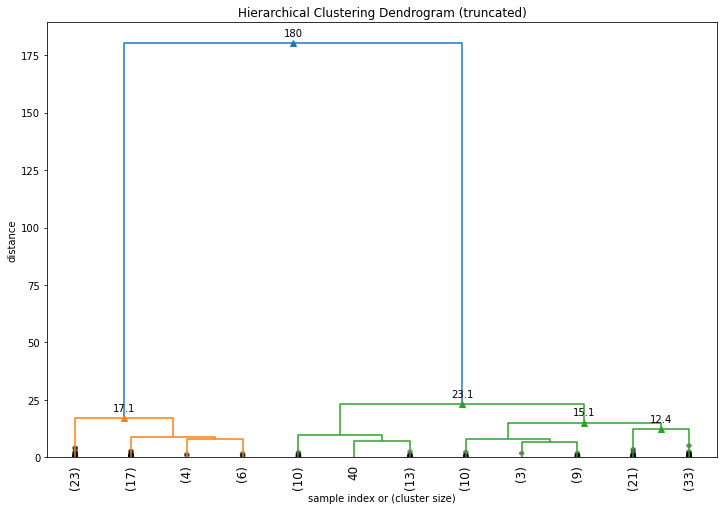

In [46]:
plt.figure(figsize=(12, 8))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [50]:
# set cut-off to 50
max_d = 50  # max_d as in max_distance

30.0 8.049352823485103
22.5 8.748222747739588
13.75 17.11527361712349
60.0 7.11106083424195
52.5 9.844278294486319
90.0 6.65621608856717
82.5 7.868785423127422
110.0 12.42734657224792
96.25 15.115331182663091
74.375 23.121989355286757
44.0625 180.27043021047612


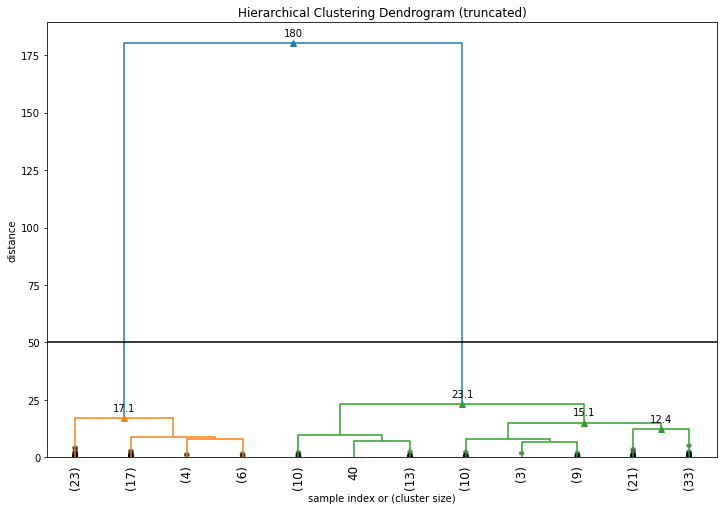

In [56]:
plt.figure(figsize=(12, 8))

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

> Number of vertical lines cut by the max_d parameter =2, so the number of clusters is = 2

> choose a cut-off of max_d = 16, we'd get 4 final clusters



In [83]:
max_d = 16

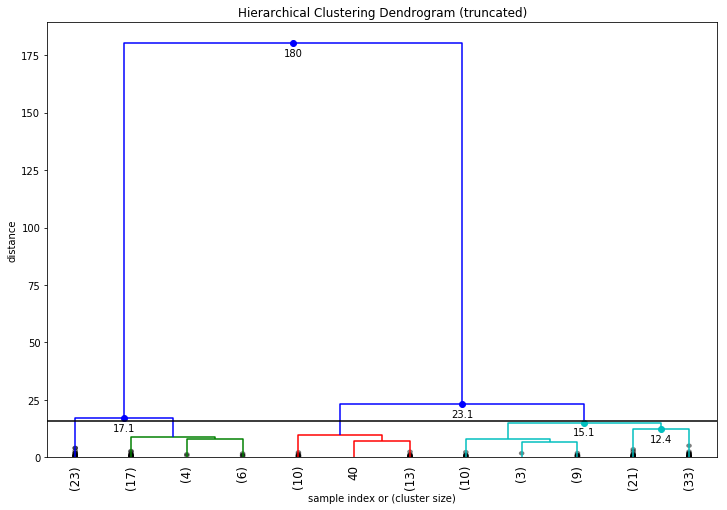

In [84]:
plt.figure(figsize=(12, 8))

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

#### Automated Cut-Off Selection

> there is __no golden method__ to pick the number of clusters for all cases (the investigative & backtesting manual method is preferable)

- The elbow method
- X-means clustering
- Information criterion approach
- An information–theoretic approach
- The silhouette method
- Cross-validation

__KNOW YOUR DATA REALLY, REALLY WELL__ 

They can give you some indication, but you should always go back in and check if the results make sense, for example with a dendrogram which is a great tool for that (especially if you have higher dimensional data that you can't simply visualize anymore).


#### compute statistics - Inconsistency Method

$ inconsistency = \frac{h−avg}{std} $

> - h - each cluster merge's height 
> - avg - average height over the depth previous levels
> - std - standard deviation over the depth previous levels:

In [87]:
depth = 5
incons = inconsistent(Z, depth)

In [89]:
incons.shape

(149, 4)

In [97]:
incons[:18]

array([[0.04151, 0.     , 1.     , 0.     ],
       [0.05914, 0.     , 1.     , 0.     ],
       [0.07107, 0.     , 1.     , 0.     ],
       [0.07137, 0.     , 1.     , 0.     ],
       [0.07543, 0.     , 1.     , 0.     ],
       [0.10928, 0.     , 1.     , 0.     ],
       [0.11007, 0.     , 1.     , 0.     ],
       [0.11302, 0.     , 1.     , 0.     ],
       [0.11429, 0.     , 1.     , 0.     ],
       [0.1212 , 0.     , 1.     , 0.     ],
       [0.12167, 0.     , 1.     , 0.     ],
       [0.1249 , 0.     , 1.     , 0.     ],
       [0.14028, 0.     , 1.     , 0.     ],
       [0.12183, 0.07179, 2.     , 0.70711],
       [0.1461 , 0.04498, 2.     , 0.70711],
       [0.18635, 0.     , 1.     , 0.     ],
       [0.20419, 0.     , 1.     , 0.     ],
       [0.20628, 0.     , 1.     , 0.     ]])

In [98]:
incons[-10:]

array([[ 1.80875,  2.17062, 10.     ,  2.44277],
       [ 2.31732,  2.19649, 16.     ,  2.52742],
       [ 2.24512,  2.44225,  9.     ,  2.37659],
       [ 2.30462,  2.44191, 21.     ,  2.63875],
       [ 2.20673,  2.68378, 17.     ,  2.84582],
       [ 1.95309,  2.581  , 29.     ,  4.05821],
       [ 3.46173,  3.53736, 28.     ,  3.29444],
       [ 3.15857,  3.54836, 28.     ,  3.93328],
       [ 4.9021 ,  5.10302, 28.     ,  3.57042],
       [12.122  , 32.15468, 30.     ,  5.22936]])

In [101]:
depth = 3
incons = inconsistent(Z, depth)

In [102]:
incons[-10:]

array([[ 3.63778,  2.55561,  4.     ,  1.35908],
       [ 3.89767,  2.57216,  7.     ,  1.54388],
       [ 3.05886,  2.66707,  6.     ,  1.87115],
       [ 4.92746,  2.7326 ,  7.     ,  1.39822],
       [ 4.76943,  3.16277,  6.     ,  1.60456],
       [ 5.27288,  3.56605,  7.     ,  2.00627],
       [ 8.22057,  4.07583,  7.     ,  1.69162],
       [ 7.83287,  4.46681,  7.     ,  2.07808],
       [11.38091,  6.2943 ,  7.     ,  1.86535],
       [37.25845, 63.31539,  7.     ,  2.25872]])

> inconsistency values heavily depend on the depth of the tree 

#### Elbow Method

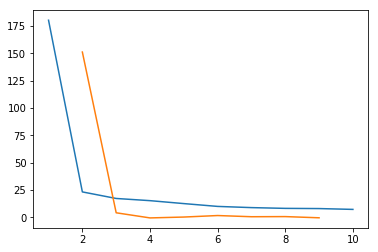

clusters: 2


In [100]:
last     = Z[-10:, 2]
last_rev = last[::-1]
idxs     = np.arange(1, len(last) + 1)

plt.plot(idxs, last_rev)

acceleration     = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()

k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

#### Retrieve the Clusters

We can use the __fcluster__ function.

##### Knowing max_d:
Let's say we determined the max distance with help of a dendrogram, then we can do the following to get the cluster id for each of our samples:

In [60]:
max_d = 10

In [61]:
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([6, 6, 3, 6, 4, 4, 4, 4, 6, 3, 3, 6, 6, 3, 5, 6, 3, 5, 5, 6, 5, 6,
       6, 6, 5, 4, 4, 4, 5, 5, 4, 5, 6, 6, 5, 5, 3, 3, 4, 4, 3, 6, 6, 5,
       6, 4, 6, 3, 5, 5, 6, 4, 6, 6, 4, 5, 6, 3, 5, 3, 4, 5, 6, 6, 4, 3,
       3, 4, 6, 6, 6, 6, 6, 5, 3, 5, 3, 3, 6, 5, 5, 3, 6, 3, 4, 3, 3, 4,
       4, 5, 3, 4, 4, 3, 6, 3, 6, 4, 6, 3, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1], dtype=int32)

In [106]:
# Or equivalently,
# k=2
# fcluster(Z, k, criterion='maxclust')

#### Visualizing Your Clusters

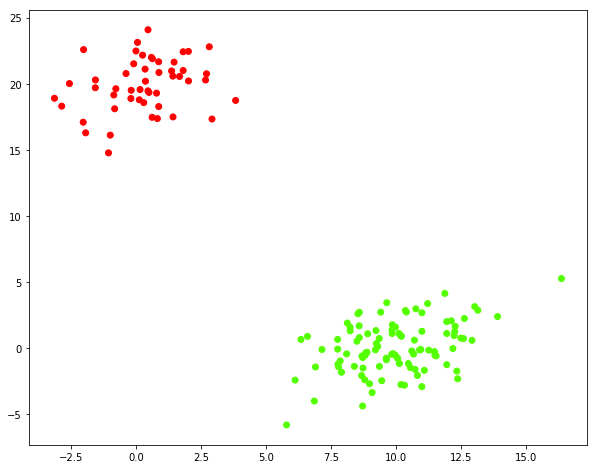

In [107]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()